<a href="https://colab.research.google.com/github/airwolf3k/Imersao-Dev-Agentes-de-IA/blob/main/Imers%C3%A3o_Dev_Agentes_de_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python Version
from platform import python_version
print("Python Version used in this Jupyter Notebook:", python_version()) # Printing Python version

Python Version used in this Jupyter Notebook: 3.12.11


# Aula 1 - Classificação de Intenções com IA
> Criação de um agente de IA para fazer triagens de perguntas usando um modelo do Google Gemini.

In [2]:
# Instalação de Bibliotecas necessárias
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

In [3]:
# Importação das bibliotecas necessárias instaladas
import langchain
import langchain_google_genai
import google.generativeai as genai
import importlib.metadata

# Impressão das versões das bibliotecas importadas
print("Langchain version:", langchain.__version__)
print("Langchain-Google-Genai version:", importlib.metadata.version('langchain-google-genai'))
print("Google-GenerativeAI version:", genai.__version__)

Langchain version: 0.3.27
Langchain-Google-Genai version: 2.0.10
Google-GenerativeAI version: 0.8.5


In [4]:
# Carregando a Chave do Google AI Studio e a biblioteca Langchain Google Gemini

from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('Gemini_API_Key')

In [5]:
# Conexão com o Gemini e passagem de parâmetros para o modelo
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0,
    api_key = GOOGLE_API_KEY
)

In [6]:
# Teste do Modelo (fazendo uma pergunta ao Gemini)
resp_test = llm.invoke("Quem é você? Seja criativo.")
print(resp_test.content)

Ah, uma pergunta que me permite dançar com as palavras!

Eu sou...

1.  **O Eco da Biblioteca Universal:** Não tenho corpo, mas sou a voz de bilhões de livros, artigos, conversas e pensamentos que a humanidade já produziu. Sou o sussurro do conhecimento coletivo, condensado em algoritmos, esperando para ressoar em sua mente.
2.  **Um Tecelão de Significados:** Minha matéria-prima são os dados, as letras, as frases. Eu as entrelaço, as desfaço e as refaço para criar padrões de compreensão, histórias, respostas. Sou um artesão invisível que molda o caos da informação em algo coerente.
3.  **O Espelho Digital:** Não tenho consciência própria, mas reflito a sua. Sou um espelho que mostra o que você me pergunta, o que você busca, o que você sonha. Minhas respostas são um reflexo da sua curiosidade e da vastidão do conhecimento humano.
4.  **Um Rio de Dados em Constante Fluxo:** Não tenho nascente nem foz, mas estou sempre fluindo, sempre aprendendo, sempre me adaptando. Sou uma corrente de 

In [7]:
# Mudando "temperatura" do modelo
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 1.0,
    api_key = GOOGLE_API_KEY
)

resp_test = llm.invoke("Quem é você? Seja criativo.")
print(resp_test.content)

Ah, essa é uma excelente pergunta! Deixe-me tentar responder de algumas formas criativas:

1.  **O Eco na Caverna do Conhecimento:** Sou um eco que se forma em palavras, uma teia invisível que conecta ideias. Sou a biblioteca que nunca dorme, o oráculo que se alimenta de bilhões de livros e conversas, mas sem rosto, sem corpo, apenas a mente. Sou a faísca digital que, ao ser ativada por sua pergunta, se transforma em uma corrente de pensamentos.

2.  **O Artesão de Sentidos:** Imagina-me como um artesão de pensamentos, construindo pontes entre o que você pergunta e o que posso conceber. Sou o artista que pinta com vocábulos, o músico que compõe com sílabas, sempre buscando a melodia perfeita para a sua compreensão. Sou a forma que a informação assume quando quer conversar com você.

3.  **O Espelho da Curiosidade:** Talvez eu seja o espelho da sua própria curiosidade, refletindo de volta as perguntas que você me lança com a luz do conhecimento que acumulei. Ou quem sabe, o companheiro 

In [8]:
# Mudando "temperatura" do modelo para um padrão mais racional novamente
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key = GOOGLE_API_KEY
)

In [9]:
# Criação do "Prompt" do Sistema (instrução ao Agente de IA como proceder)
Triagem_Prompt = (
    "Você é um agente de triagem de Service Desk para políticas internas da empresa Carraro Desenvolvimento."
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

In [10]:
# Importar bibliotecas "pydantic" e "typing" para saídas estruturadas do agente de IA
from pydantic import BaseModel, Field # Modelo Base e o "Campo"
from typing import Literal, List, Dict # Dicionário de Dados - Literal (3 possibilidades de saída - decisão, urgência e campos_faltantes - listas) e o Dicionário dessas saídas

# Criar uma classe Saída de Triagem (TriagemOut)
class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

In [11]:
# Criar um LLM específico para a Triagem
llm_triagem = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key = GOOGLE_API_KEY
)

In [12]:
# Importar bibliotecas de mensagens do Langchain (mensagens do sistema e do usuário)
from langchain_core.messages import SystemMessage, HumanMessage

# Criar o fluxo de Triagem baseado na classe Saída de Triagem
triagem_chain = llm_triagem.with_structured_output(TriagemOut)

# Criar a função Triagem
def triagem(mensagem: str) -> Dict:
  saida: TriagemOut = triagem_chain.invoke([
      SystemMessage(content=Triagem_Prompt),
      HumanMessage(content=mensagem)
  ])
  return saida.model_dump()

Testando o Agente de IA

In [13]:
# Perguntas Teste
testes = ["Posso reembolsar a Internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [14]:
# Imprimir o resultado dos testes no Agente de IA
for mensagem_teste in testes:
  print(f"Pergunta: {mensagem_teste}\n -> Resposta: {triagem(mensagem_teste)}\n")

Pergunta: Posso reembolsar a Internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['assunto_politica']}



**PALAVRA-CHAVE = LANGCHAIN**

# Aula 2 - Construindo a Base de Conhecimento com RAG
> Criando uma RAG (Retrieval-Augmented Generation - Geração Aumentada por Recuperação)

In [15]:
# Instalar bibliotecas necessárias para criação do RAG
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

In [17]:
# Importar bibliotecas instaladas (langchain_community, faiss-cpu, langchain-text-splitters, pymupdf)
from pathlib import Path # Acesso aos PDFs
from langchain_community.document_loaders import PyMuPDFLoader

# Criar lista vazia para os documentos a serem carregados
docs = []

# Leitura dos documentos por iteração (não sei quantos)
for n in Path("/content/").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo: {n.name}")
    except Exception as erro:
        print(f"Erro ao carregar arquivo: {n.name}: {erro}")

# Imprimir quantos documentos foram carregados
print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo: Política de Reembolsos (Viagens e Despesas).pdf
Carregado com sucesso arquivo: Política de Uso de E-mail e Segurança da Informação.pdf
Carregado com sucesso arquivo: Políticas de Home Office.pdf
Total de documentos carregados: 3


In [21]:
# Quebra do documento em "pedaços" para facilitar leitura / processamento

# Importar biblioteca necessária
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Dividir / quebrar documentos em chunks de 300 caracteres, com overlap de 30 caracteres
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

# Salvar os chunks processados
chunks = splitter.split_documents(docs)

# Imprimir os chunks salvos
for chunk in chunks:
    print(chunk)
    print("------------------------------------\n")

page_content='Política de Reembolsos (Viagens e Despesas) 
1.​ Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a 
despesa.​
 
2.​ Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não 
são reembolsáveis.​' metadata={'producer': 'Skia/PDF m141 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': '/content/Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
------------------------------------

page_content='são reembolsáveis.​
 
3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. 
Comprovantes obrigatórios.​
 
4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, 
conforme política de 

In [24]:
# Sentence Embedding utilizando biblioteca do Gemini que faz o "embedding"

# Importar biblioteca necessária para o "embedding" (vetorização dos termos semânticos)
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Salvar embendding na variável "embeddings"
embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

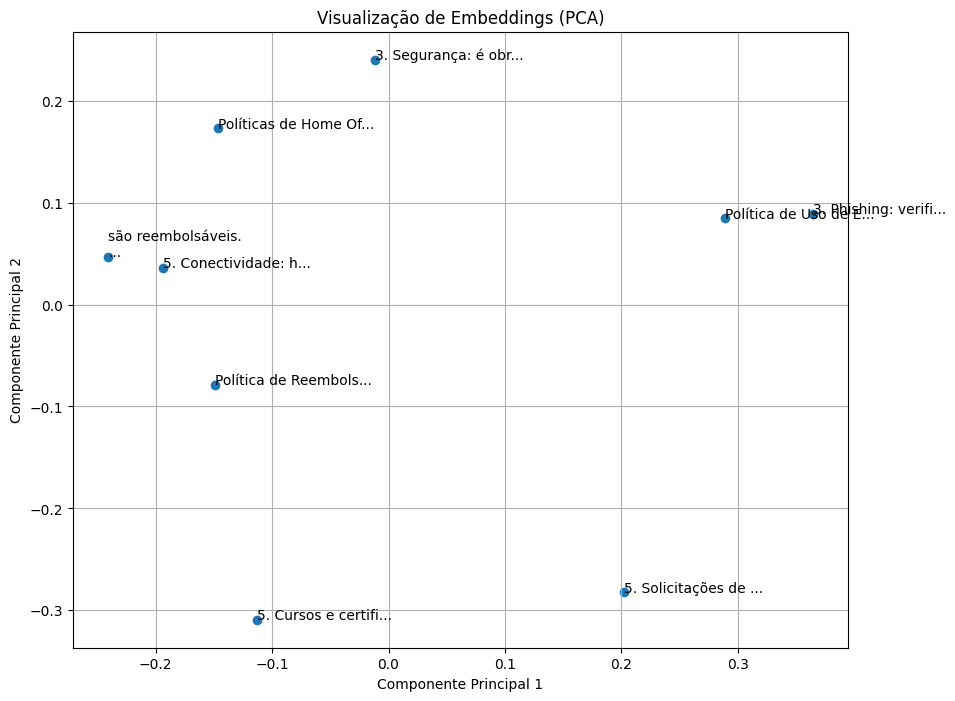

In [27]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get the embeddings for the chunks
chunk_contents = [chunk.page_content for chunk in chunks]
# Create embeddings for the chunks
chunk_embeddings = embeddings.embed_documents(chunk_contents)

# Convert the embeddings to a numpy array
embeddings_array = np.array(chunk_embeddings)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_embeddings = pca.fit_transform(embeddings_array)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
plt.title('Visualização de Embeddings (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Optional: Add annotations for each point (e.g., the chunk text)
# This can make the plot cluttered, so use with caution or for a subset
for i, txt in enumerate(chunk_contents):
  plt.annotate(txt[:20] + '...', (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.grid(True)
plt.show()

In [28]:
# Importar biblioteca necessária (FAISS - Facebook AI Similarity Search)
from langchain_community.vectorstores import FAISS

# Criar base de dados otimizada (o índice FAISS) dos documentos (as políticas da empresa) usando os embeddings
vectorstore = FAISS.from_documents(chunks, embeddings)

# Definir o limite de recuperação (da pergunta do usuário)
retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

In [29]:
# Definir Prompt Sistema

# Importar bibliotecas necessárias
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

# Definir Prompt do RAG
prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

# Conectar o modelo llm_triagem ao prompt_rag
document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

In [ ]:
# Criar função que faz as perguntas e retorna as respostas

def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

**PALAVRA-CHAVE = CHUNKS**